In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from matplotlib import pyplot as plt

In [3]:
df_train = pd.read_csv('train.csv')
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

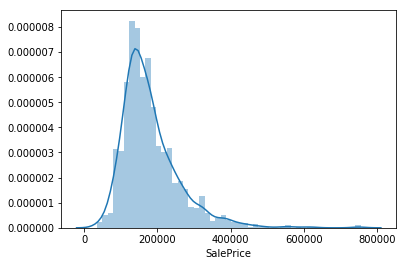

In [6]:
sns.distplot(df_train['SalePrice']);

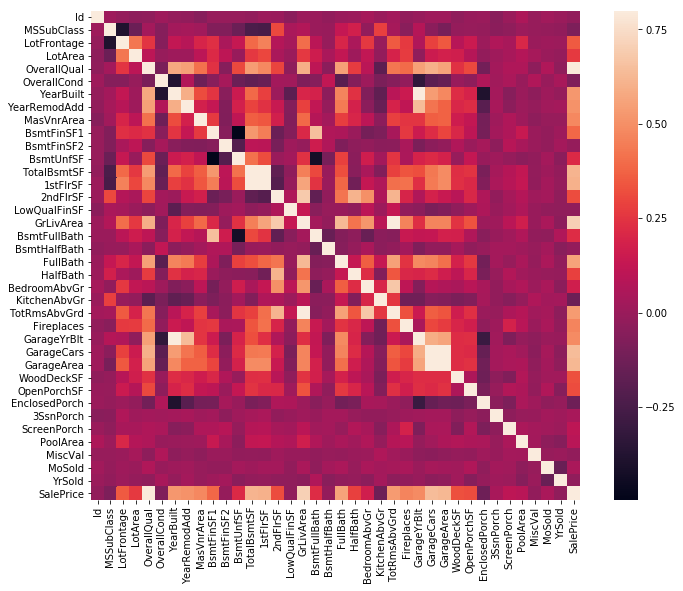

In [7]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

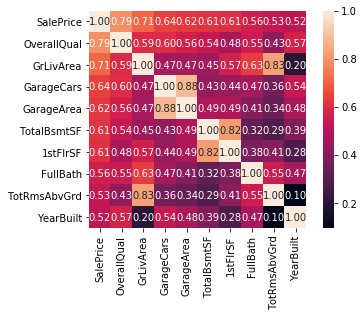

In [8]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice').index
cm = np.corrcoef(df_train[cols].values.T)
cm
#sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

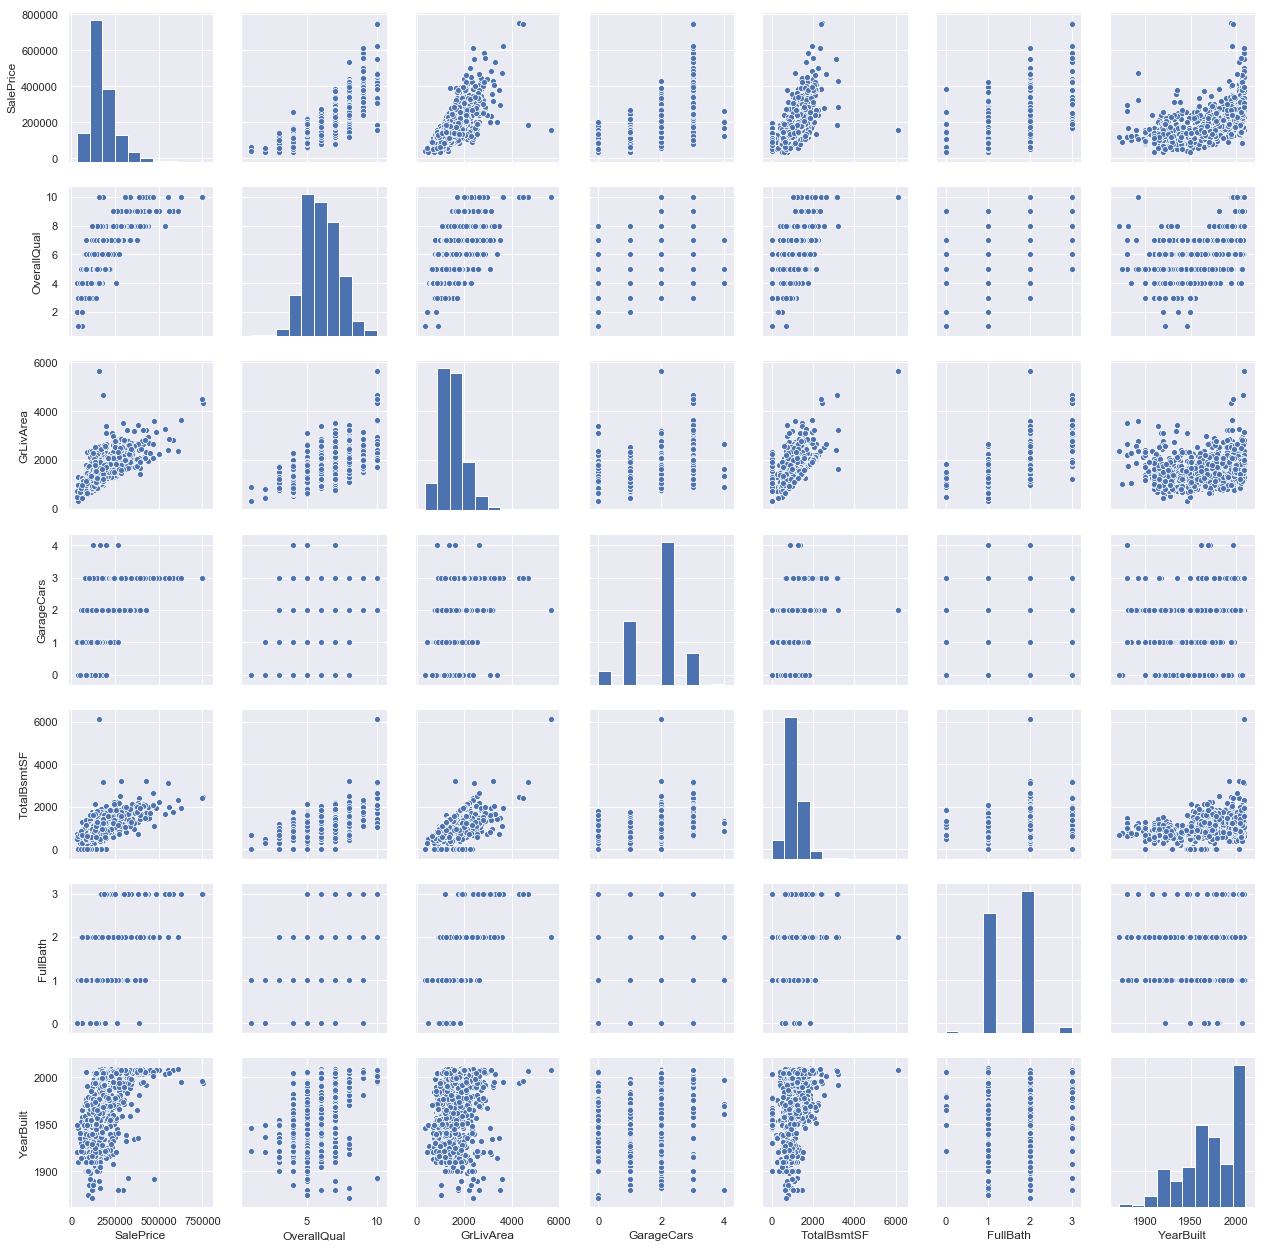

In [9]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

In [10]:
df_train[cols].head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,208500,7,1710,2,856,2,2003
1,181500,6,1262,2,1262,2,1976
2,223500,7,1786,2,920,2,2001
3,140000,7,1717,3,756,1,1915
4,250000,8,2198,3,1145,2,2000


In [13]:
#todo:
# -- clean data
# -- build net

df_train[cols].isnull().sum()

SalePrice      0
OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
dtype: int64

In [32]:
pred = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
predictors = df_train[pred] # all columns except SalePrice
target = df_train['SalePrice'] 

In [33]:
predictors.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,7,1710,2,856,2,2003
1,6,1262,2,1262,2,1976
2,7,1786,2,920,2,2001
3,7,1717,3,756,1,1915
4,8,2198,3,1145,2,2000


In [34]:
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [36]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,0.651256,0.370207,0.311618,-0.459145,0.789470,1.050634
1,-0.071812,-0.482347,0.311618,0.466305,0.789470,0.156680
2,0.651256,0.514836,0.311618,-0.313261,0.789470,0.984415
3,0.651256,0.383528,1.649742,-0.687089,-1.025689,-1.862993
4,1.374324,1.298881,1.649742,0.199611,0.789470,0.951306


In [37]:
n_cols = predictors_norm.shape[1] # number of predictors

In [38]:
import keras

Using TensorFlow backend.


In [39]:
from keras.models import Sequential
from keras.layers import Dense

In [209]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    #model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    #model.add(Dense(50, activation='relu'))
    
    model.add(Dense(1000, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# build the model
model = regression_model()

# fit the model
history = model.fit(predictors_norm, target, epochs=10000, verbose=2)


Epoch 1/10000
 - 6s - loss: 20105470585.3370
Epoch 2/10000
 - 6s - loss: 3061888907.2219
Epoch 3/10000
 - 5s - loss: 2249852848.3945
Epoch 4/10000
 - 5s - loss: 1867295666.8493
Epoch 5/10000
 - 5s - loss: 1813990781.8959
Epoch 6/10000
 - 5s - loss: 1769474261.9178
Epoch 7/10000
 - 5s - loss: 1583278882.7178
Epoch 8/10000
 - 5s - loss: 1438272972.0986
Epoch 9/10000
 - 5s - loss: 1693581298.8493
Epoch 10/10000
 - 5s - loss: 1586171402.5205
Epoch 11/10000
 - 5s - loss: 1401094223.2548
Epoch 12/10000
 - 5s - loss: 1349947395.6822
Epoch 13/10000
 - 5s - loss: 1236144901.6110
Epoch 14/10000
 - 5s - loss: 1394233672.5918
Epoch 15/10000
 - 5s - loss: 1183189564.4932
Epoch 16/10000
 - 5s - loss: 1433058381.3260
Epoch 17/10000
 - 6s - loss: 1188201428.6904
Epoch 18/10000
 - 7s - loss: 1197585577.8192
Epoch 19/10000
 - 7s - loss: 1154650180.3836
Epoch 20/10000
 - 8s - loss: 1122591857.2712
Epoch 21/10000
 - 7s - loss: 1092761273.8630
Epoch 22/10000
 - 7s - loss: 1064903136.3507
Epoch 23/10000
 - 

Epoch 185/10000
 - 7s - loss: 550838422.4438
Epoch 186/10000
 - 6s - loss: 586236258.9370
Epoch 187/10000
 - 6s - loss: 554877763.1562
Epoch 188/10000
 - 6s - loss: 504860082.3233
Epoch 189/10000
 - 7s - loss: 506500558.2027
Epoch 190/10000
 - 7s - loss: 538711051.5726
Epoch 191/10000
 - 7s - loss: 571659003.4411
Epoch 192/10000
 - 6s - loss: 518162855.7151
Epoch 193/10000
 - 7s - loss: 527794531.4192
Epoch 194/10000
 - 7s - loss: 587749245.1945
Epoch 195/10000
 - 7s - loss: 514376758.8822
Epoch 196/10000
 - 7s - loss: 504413400.8986
Epoch 197/10000
 - 7s - loss: 499028272.5699
Epoch 198/10000
 - 7s - loss: 568698615.4959
Epoch 199/10000
 - 7s - loss: 549589164.8000
Epoch 200/10000
 - 6s - loss: 569198418.1479
Epoch 201/10000
 - 6s - loss: 506211562.3452
Epoch 202/10000
 - 7s - loss: 501486990.6849
Epoch 203/10000
 - 6s - loss: 546757234.1479
Epoch 204/10000
 - 6s - loss: 546401406.8164
Epoch 205/10000
 - 6s - loss: 522126819.4192
Epoch 206/10000
 - 6s - loss: 518869780.8658
Epoch 207/

 - 7s - loss: 389719724.8877
Epoch 368/10000
 - 7s - loss: 447221748.1644
Epoch 369/10000
 - 7s - loss: 428106114.8055
Epoch 370/10000
 - 7s - loss: 403040276.1644
Epoch 371/10000
 - 7s - loss: 356160487.5397
Epoch 372/10000
 - 7s - loss: 370522725.1726
Epoch 373/10000
 - 7s - loss: 358878541.2384
Epoch 374/10000
 - 7s - loss: 344423743.5178
Epoch 375/10000
 - 7s - loss: 421459831.8466
Epoch 376/10000
 - 7s - loss: 406335774.1589
Epoch 377/10000
 - 7s - loss: 379254438.5753
Epoch 378/10000
 - 7s - loss: 392414471.8027
Epoch 379/10000
 - 7s - loss: 366211273.6000
Epoch 380/10000
 - 7s - loss: 372402615.3205
Epoch 381/10000
 - 7s - loss: 349262125.9397
Epoch 382/10000
 - 7s - loss: 362375240.7671
Epoch 383/10000
 - 7s - loss: 342858022.9260
Epoch 384/10000
 - 7s - loss: 372857573.6986
Epoch 385/10000
 - 7s - loss: 347506721.1397
Epoch 386/10000
 - 7s - loss: 314445180.4932
Epoch 387/10000
 - 7s - loss: 345820975.6932
Epoch 388/10000
 - 7s - loss: 333342799.6055
Epoch 389/10000
 - 7s - lo

Epoch 550/10000
 - 7s - loss: 245695214.4658
Epoch 551/10000
 - 7s - loss: 242074661.2822
Epoch 552/10000
 - 7s - loss: 252884240.7452
Epoch 553/10000
 - 7s - loss: 277448671.0137
Epoch 554/10000
 - 7s - loss: 336860797.7205
Epoch 555/10000
 - 7s - loss: 269382321.3589
Epoch 556/10000
 - 7s - loss: 250521712.2192
Epoch 557/10000
 - 7s - loss: 262492570.6082
Epoch 558/10000
 - 7s - loss: 291541559.2767
Epoch 559/10000
 - 7s - loss: 271350746.8712
Epoch 560/10000
 - 7s - loss: 250976215.5397
Epoch 561/10000
 - 7s - loss: 313215281.9726
Epoch 562/10000
 - 7s - loss: 266760657.8849
Epoch 563/10000
 - 7s - loss: 265505817.6438
Epoch 564/10000
 - 7s - loss: 279774754.8932
Epoch 565/10000
 - 7s - loss: 262113014.5315
Epoch 566/10000
 - 7s - loss: 271876878.8164
Epoch 567/10000
 - 7s - loss: 268445700.1205
Epoch 568/10000
 - 7s - loss: 237030558.9918
Epoch 569/10000
 - 7s - loss: 228598760.3726
Epoch 570/10000
 - 7s - loss: 262087554.9589
Epoch 571/10000
 - 7s - loss: 257632612.0329
Epoch 572/

 - 7s - loss: 198274679.1890
Epoch 733/10000
 - 7s - loss: 199555740.1425
Epoch 734/10000
 - 7s - loss: 223003319.7151
Epoch 735/10000
 - 7s - loss: 213441102.7726
Epoch 736/10000
 - 7s - loss: 242325547.0027
Epoch 737/10000
 - 7s - loss: 285310941.1945
Epoch 738/10000
 - 7s - loss: 215063883.4411
Epoch 739/10000
 - 7s - loss: 217608063.0356
Epoch 740/10000
 - 7s - loss: 196904061.1068
Epoch 741/10000
 - 7s - loss: 196323970.8055
Epoch 742/10000
 - 7s - loss: 206681616.6137
Epoch 743/10000
 - 7s - loss: 203156312.0219
Epoch 744/10000
 - 7s - loss: 241902878.8822
Epoch 745/10000
 - 7s - loss: 251480274.3671
Epoch 746/10000
 - 7s - loss: 219958865.9726
Epoch 747/10000
 - 7s - loss: 198023558.9260
Epoch 748/10000
 - 7s - loss: 198441914.5205
Epoch 749/10000
 - 7s - loss: 201485067.2877
Epoch 750/10000
 - 7s - loss: 192025502.8603
Epoch 751/10000
 - 7s - loss: 225213114.3890
Epoch 752/10000
 - 7s - loss: 214767300.9534
Epoch 753/10000
 - 7s - loss: 241319498.6740
Epoch 754/10000
 - 7s - lo

Epoch 915/10000
 - 7s - loss: 179412565.8740
Epoch 916/10000
 - 7s - loss: 163943698.1479
Epoch 917/10000
 - 7s - loss: 162229027.9452
Epoch 918/10000
 - 7s - loss: 167884330.3616
Epoch 919/10000
 - 7s - loss: 164430507.1123
Epoch 920/10000
 - 7s - loss: 191006245.0411
Epoch 921/10000
 - 7s - loss: 199984749.8082
Epoch 922/10000
 - 7s - loss: 159402202.7616
Epoch 923/10000
 - 7s - loss: 158789041.0521
Epoch 924/10000
 - 7s - loss: 159579603.6603
Epoch 925/10000
 - 7s - loss: 181993473.6219
Epoch 926/10000
 - 9s - loss: 184350153.6877
Epoch 927/10000
 - 9s - loss: 164705422.7288
Epoch 928/10000
 - 8s - loss: 180361689.7753
Epoch 929/10000
 - 7s - loss: 187835089.7534
Epoch 930/10000
 - 8s - loss: 174022028.3178
Epoch 931/10000
 - 8s - loss: 151398763.3096
Epoch 932/10000
 - 8s - loss: 181453937.5781
Epoch 933/10000
 - 8s - loss: 165059740.7671
Epoch 934/10000
 - 8s - loss: 156970653.4575
Epoch 935/10000
 - 7s - loss: 153759037.3918
Epoch 936/10000
 - 8s - loss: 154198141.3041
Epoch 937/

Epoch 1095/10000
 - 7s - loss: 154916309.4356
Epoch 1096/10000
 - 7s - loss: 124014721.0959
Epoch 1097/10000
 - 7s - loss: 152272026.2137
Epoch 1098/10000
 - 7s - loss: 148518012.0986
Epoch 1099/10000
 - 7s - loss: 137095321.9726
Epoch 1100/10000
 - 7s - loss: 148894389.9288
Epoch 1101/10000
 - 7s - loss: 131137253.7863
Epoch 1102/10000
 - 7s - loss: 118865680.2630
Epoch 1103/10000
 - 7s - loss: 134619996.3616
Epoch 1104/10000
 - 7s - loss: 135013479.9342
Epoch 1105/10000
 - 7s - loss: 119115315.2822
Epoch 1106/10000
 - 7s - loss: 126549459.5507
Epoch 1107/10000
 - 7s - loss: 122589212.8877
Epoch 1108/10000
 - 7s - loss: 117122170.8274
Epoch 1109/10000
 - 7s - loss: 140644572.0110
Epoch 1110/10000
 - 7s - loss: 130108843.4575
Epoch 1111/10000
 - 7s - loss: 125515433.7973
Epoch 1112/10000
 - 7s - loss: 114324006.7945
Epoch 1113/10000
 - 7s - loss: 111195982.9041
Epoch 1114/10000
 - 7s - loss: 115142927.9562
Epoch 1115/10000
 - 7s - loss: 113295408.5260
Epoch 1116/10000
 - 7s - loss: 125

 - 8s - loss: 144622953.3808
Epoch 1274/10000
 - 8s - loss: 120643814.6192
Epoch 1275/10000
 - 8s - loss: 100200225.0082
Epoch 1276/10000
 - 8s - loss: 100009546.1041
Epoch 1277/10000
 - 9s - loss: 120456889.9068
Epoch 1278/10000
 - 10s - loss: 119274253.6767
Epoch 1279/10000
 - 9s - loss: 122515847.2767
Epoch 1280/10000
 - 9s - loss: 100893395.0575
Epoch 1281/10000
 - 9s - loss: 110689000.8986
Epoch 1282/10000
 - 9s - loss: 151710798.5315
Epoch 1283/10000
 - 8s - loss: 124673587.9014
Epoch 1284/10000
 - 8s - loss: 110448524.6575
Epoch 1285/10000
 - 8s - loss: 109313180.7781
Epoch 1286/10000
 - 8s - loss: 94334286.3918
Epoch 1287/10000
 - 9s - loss: 99841391.8247
Epoch 1288/10000
 - 8s - loss: 96095946.2137
Epoch 1289/10000
 - 9s - loss: 102096358.4438
Epoch 1290/10000
 - 9s - loss: 111689333.5123
Epoch 1291/10000
 - 9s - loss: 108105745.0301
Epoch 1292/10000
 - 9s - loss: 106169718.5918
Epoch 1293/10000
 - 9s - loss: 101187332.9534
Epoch 1294/10000
 - 9s - loss: 102174234.2137
Epoch 1

 - 11s - loss: 105948264.1973
Epoch 1451/10000
 - 12s - loss: 96661334.0603
Epoch 1452/10000
 - 12s - loss: 93422176.8219
Epoch 1453/10000
 - 11s - loss: 86985705.4685
Epoch 1454/10000
 - 11s - loss: 91473899.2329
Epoch 1455/10000
 - 11s - loss: 102346835.3315
Epoch 1456/10000
 - 12s - loss: 92672573.8301
Epoch 1457/10000
 - 11s - loss: 103625872.2959
Epoch 1458/10000
 - 11s - loss: 86570259.9890
Epoch 1459/10000
 - 11s - loss: 90155548.8877
Epoch 1460/10000
 - 11s - loss: 87187372.0877
Epoch 1461/10000
 - 11s - loss: 94931901.5014
Epoch 1462/10000
 - 11s - loss: 92128482.8493
Epoch 1463/10000
 - 11s - loss: 102451088.6027
Epoch 1464/10000
 - 11s - loss: 121465443.7808
Epoch 1465/10000
 - 11s - loss: 126793659.9671
Epoch 1466/10000
 - 11s - loss: 94774717.6767
Epoch 1467/10000
 - 11s - loss: 81550001.5890
Epoch 1468/10000
 - 11s - loss: 89287890.9151
Epoch 1469/10000
 - 11s - loss: 100355801.4247
Epoch 1470/10000
 - 11s - loss: 113662789.8082
Epoch 1471/10000
 - 11s - loss: 90275214.94

Epoch 1630/10000
 - 9s - loss: 100157832.6795
Epoch 1631/10000
 - 9s - loss: 80336338.8110
Epoch 1632/10000
 - 8s - loss: 83784280.5699
Epoch 1633/10000
 - 8s - loss: 73905304.3507
Epoch 1634/10000
 - 8s - loss: 67978937.2493
Epoch 1635/10000
 - 8s - loss: 99403855.2767
Epoch 1636/10000
 - 8s - loss: 113625908.6904
Epoch 1637/10000
 - 9s - loss: 106550412.0548
Epoch 1638/10000
 - 8s - loss: 90286342.2247
Epoch 1639/10000
 - 8s - loss: 79605969.6932
Epoch 1640/10000
 - 9s - loss: 89063091.5507
Epoch 1641/10000
 - 8s - loss: 82746124.7616
Epoch 1642/10000
 - 9s - loss: 80098563.0904
Epoch 1643/10000
 - 9s - loss: 74975383.1671
Epoch 1644/10000
 - 9s - loss: 75000568.1753
Epoch 1645/10000
 - 8s - loss: 96469606.2247
Epoch 1646/10000
 - 8s - loss: 121952285.3370
Epoch 1647/10000
 - 8s - loss: 130521601.0740
Epoch 1648/10000
 - 8s - loss: 116165012.6904
Epoch 1649/10000
 - 8s - loss: 88335195.2658
Epoch 1650/10000
 - 8s - loss: 117323970.1918
Epoch 1651/10000
 - 8s - loss: 95533645.1726
Epo

Epoch 1810/10000
 - 11s - loss: 87515281.3808
Epoch 1811/10000
 - 11s - loss: 76556919.1014
Epoch 1812/10000
 - 11s - loss: 70485584.7836
Epoch 1813/10000
 - 11s - loss: 67065068.6466
Epoch 1814/10000
 - 11s - loss: 85384903.3425
Epoch 1815/10000
 - 11s - loss: 83081470.6849
Epoch 1816/10000
 - 11s - loss: 66979928.6137
Epoch 1817/10000
 - 11s - loss: 77040714.6356
Epoch 1818/10000
 - 12s - loss: 78393575.4301
Epoch 1819/10000
 - 11s - loss: 62132160.5041
Epoch 1820/10000
 - 11s - loss: 60753618.4548
Epoch 1821/10000
 - 11s - loss: 63696417.1945
Epoch 1822/10000
 - 11s - loss: 61277698.1041
Epoch 1823/10000
 - 11s - loss: 64418530.7397
Epoch 1824/10000
 - 11s - loss: 72845121.8192
Epoch 1825/10000
 - 11s - loss: 68982664.5315
Epoch 1826/10000
 - 12s - loss: 81297690.8712
Epoch 1827/10000
 - 12s - loss: 94924166.0055
Epoch 1828/10000
 - 11s - loss: 109612168.1315
Epoch 1829/10000
 - 12s - loss: 76634522.3890
Epoch 1830/10000
 - 12s - loss: 78695370.2795
Epoch 1831/10000
 - 11s - loss: 7

Epoch 1989/10000


dict_keys(['loss'])


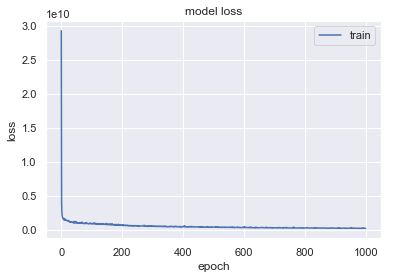

In [190]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper right')
plt.legend(['train'], loc='upper right')
plt.show()

In [191]:
#Xnew = np.array([[1.374324, 1.298881, 1.649742, 0.199611, 0.789470, 0.951306]])
#ynew=model.predict(Xnew)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
Xnew = predictors_norm[0:5]
#Xnew
ynew=model.predict(Xnew)
ynew

array([[198050.12],
       [177047.45],
       [201252.27],
       [143096.1 ],
       [263672.47]], dtype=float32)

In [192]:
#test set
df_test_answer = pd.read_csv('test.csv')
df_test = df_test_answer[pred]
df_test.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,5,896,1.0,882.0,1,1961
1,6,1329,1.0,1329.0,1,1958
2,5,1629,2.0,928.0,2,1997
3,6,1604,2.0,926.0,2,1998
4,8,1280,2.0,1280.0,2,1992


In [193]:
predictors_norm_test = (df_test - df_test.mean()) / df_test.std()
predictors_norm_test.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,-0.750844,-1.215171,-0.987335,-0.370554,-1.028367,-0.340828
1,-0.054858,-0.323429,-0.987335,0.638706,-1.028367,-0.439544
2,-0.750844,0.294407,0.301416,-0.266693,0.772818,0.843770
3,-0.054858,0.242921,0.301416,-0.271209,0.772818,0.876675
4,1.337113,-0.424342,0.301416,0.528071,0.772818,0.679242


In [194]:
answer = model.predict(predictors_norm_test)
answer

array([[118903.805],
       [151922.8  ],
       [153743.3  ],
       ...,
       [133705.83 ],
       [107104.945],
       [239941.75 ]], dtype=float32)

In [195]:
df_answer = df_test_answer['Id']
#answer.reshape(len(answer),1)

my_list = map(lambda x: x[0], answer)
ser = pd.Series(my_list)


a = pd.concat([df_answer, ser], axis=1)
a.rename(columns={0: 'SalePrice'}, inplace=True)

#df_answer.loc[:, ("SalePrice")] = ser
#df_answer['SalePrice'] = answer

In [205]:
a.head()
#a.columns

,Id,SalePrice
0,1461,118903.804688
1,1462,151922.796875
2,1463,153743.296875
3,1464,187746.859375
4,1465,181480.062500


In [197]:
a['SalePrice'].describe()

count      1459.000000
mean     183161.073011
std       79140.209446
min       22678.523438
25%      130741.136719
50%      163696.015625
75%      215201.734375
max      626277.625000
Name: SalePrice, dtype: float64

In [198]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

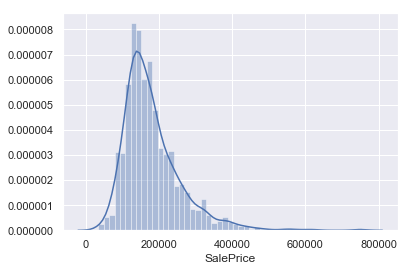

In [202]:
sns.distplot(df_train['SalePrice']);

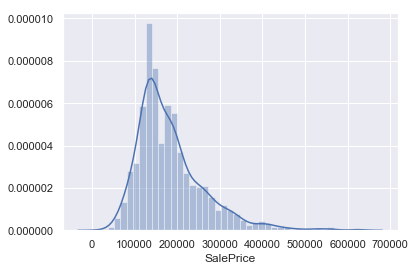

In [200]:
sns.distplot(a['SalePrice']);

In [207]:
a.to_csv('answer.csv',index=False)